# Running the NUMAR model



Original paper: Chen, Ronghua & Twilley, Robert. (1999). A Simulation Model of Organic Matter and Nutrient Accumulation in Mangrove Wetland Soils. Biogeochemistry. 44. 93-118. 10.1007/BF00993000. https://www.researchgate.net/publication/226714484_A_Simulation_Model_of_Organic_Matter_and_Nutrient_Accumulation_in_Mangrove_Wetland_Soils
- Python Conversion: Tom Kaiser
- Python Wrapper and Notebook: Alex Christensen
- Model Updates For Marsh: Andy Cassaway and Pradipta Biswas





# 1a. Import Python Packages

In [40]:
import sys
import os
from pathlib import Path
import rasterio
from  matplotlib.colors import ListedColormap, BoundaryNorm
from  matplotlib.cm import ScalarMappable
import math
import pandas as pd
import earthaccess
import cartopy.crs as ccrs
import imageio



In [ ]:
earthaccess.login()

# 1b. Set working directories

In [2]:
example_dir = Path(os.getcwd())
repo_dir = example_dir.parent.absolute()
script_dir = repo_dir / 'src'
working_dir = repo_dir / 'data'
sys.path.insert(1,str(script_dir))


# 1c. Import NUMAR model

In [3]:
from landscape import run_numar 
from input_files import *

In [4]:
ref_file = example_dir / 'aoi_4326.shp'
res = 10
AOI = gpd.read_file(ref_file)
bounds_4326 =  AOI.total_bounds

x1,y1,x2,y2 = math.floor(bounds_4326[0]),math.floor(bounds_4326[3]),math.floor(bounds_4326[2]),math.floor(bounds_4326[1])

zone = int(np.ceil((bounds_4326[0] + 180)/6))

if y1>=0 and y2>=0:
    NS = 'n'
    EPSG = 32200+zone
elif y1>=0 and y2<0:
    NS = 'n'
    NS2 = 's'
    EPSG = 32200+zone
else:
    NS = 's'
    y = abs(y1)
    EPSG = 32700+zone
if x1>=0:
    EW = 'e'
elif x1<0 and x2>=0:
    EW = 'e'
    EW2 = 'w'
else:
    EW = 'w'
    x = abs(x1)
print('UTM Zone: %s%s EPSG: %s' %(zone,NS,EPSG))

AOI_utm = AOI.to_crs(EPSG)
AOI_utm.to_file(example_dir / ('aoi_%s.shp' %(EPSG)))

os.system('gdal_rasterize -burn 0 -tr %s %s %s %s' %(res,res,example_dir/('aoi_%s.shp'%(EPSG)),example_dir / ('aoi_%s.tif'%(EPSG))))


UTM Zone: 15n EPSG: 32215
0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [5]:
ref_file = example_dir / ('aoi_%s.tif' %(EPSG))
AOI = rasterio.open(ref_file)

profile = AOI.profile


## The next cell will download the required datasets

- #### Delta-X AVIRIS-NG Aboveground Biomass (spring and Fall)
- #### ESA WorldCover 2021 Landcover Maps
- #### CPRA Vegetation
- #### Delta-X Delft3D Annual inorganic mass accumulation rate (IMAR)


In [6]:
AGB, SALINITY, LANDCOVER, MORPHO, BASINS, CLASSES, mask, lats,lons = get_input_files(AOI,example_dir,working_dir,EPSG,bounds_4326)



##### ABOVEGROUND BIOMASS


# Search EarthData for AVIRIS-NG Aboveground Biomass Data over the AOI

Granules found: 4
# Download ABOVEGROUND BIOMASS from Spring 2021 and Fall 2021 AVIRIS-NG data products: 

'NoneType' object has no attribute 'get'
You must call earthaccess.login() before you can download data
'NoneType' object has no attribute 'get'
You must call earthaccess.login() before you can download data
'NoneType' object has no attribute 'get'
You must call earthaccess.login() before you can download data
'NoneType' object has no attribute 'get'
You must call earthaccess.login() before you can download data
# Merging AGB tiles

# Crop the WorldCover file to AOI and resample to  10.0m 

--> Saved as /Users/alchrist/Documents/GitHub/deltax_workshop_2024/tutorials/6_NUMARModel/Landscape_example/AVIRIS_AGB.tif



##### ESA WorldCover landcover type


# Download ESA WorldCover 2021



  0%|          | 0/4 [00:00<?, ?it/s]

	 N27W090
	 N30W090
	 N30W093
	 N27W093
# Merging landcover tiles

# Crop the WorldCover file to AOI and resample to  10.0m 



Warning 1: for band 1, destination nodata value has been clamped to 0, the original value being out of range.


--> Saved as /Users/alchrist/Documents/GitHub/deltax_workshop_2024/tutorials/6_NUMARModel/Landscape_example/ESA_WorldCover2021.tif



##### CPRA Vegetation Type (with Salinity Zones)

# Reprojecting

# Crop the Salinity file to AOI and resample to  10.0m 

--> Saved as /Users/alchrist/Documents/GitHub/deltax_workshop_2024/tutorials/6_NUMARModel/Landscape_example/CPRA_Salinity.tif



##### Modified Hydrologic Basins

# Reprojecting



Warning 1: for band 1, destination nodata value has been clamped to 0, the original value being out of range.


# Crop the Basin file to AOI and resample to  10.0m 

--> Saved as /Users/alchrist/Documents/GitHub/deltax_workshop_2024/tutorials/6_NUMARModel/Landscape_example/HUC_basins.tif



##### Delft3D Inorganice Mass Accumulation Rate (IMAR)


# Search EarthData for Delft3D Sediment Model Data over the AOI

Granules found: 1
# Download IMAR Delft3D data products: 

'NoneType' object has no attribute 'get'
You must call earthaccess.login() before you can download data
# Convert the Delft3D IMAR netCDF4 file to Geotiff

# Crop the Delft3D IMAR file to AOI and resample to 10.0m 

--> Saved as /Users/alchrist/Documents/GitHub/deltax_workshop_2024/tutorials/6_NUMARModel/Landscape_example/Delft3D_IMAR.tif


##### Delta-X Watermask


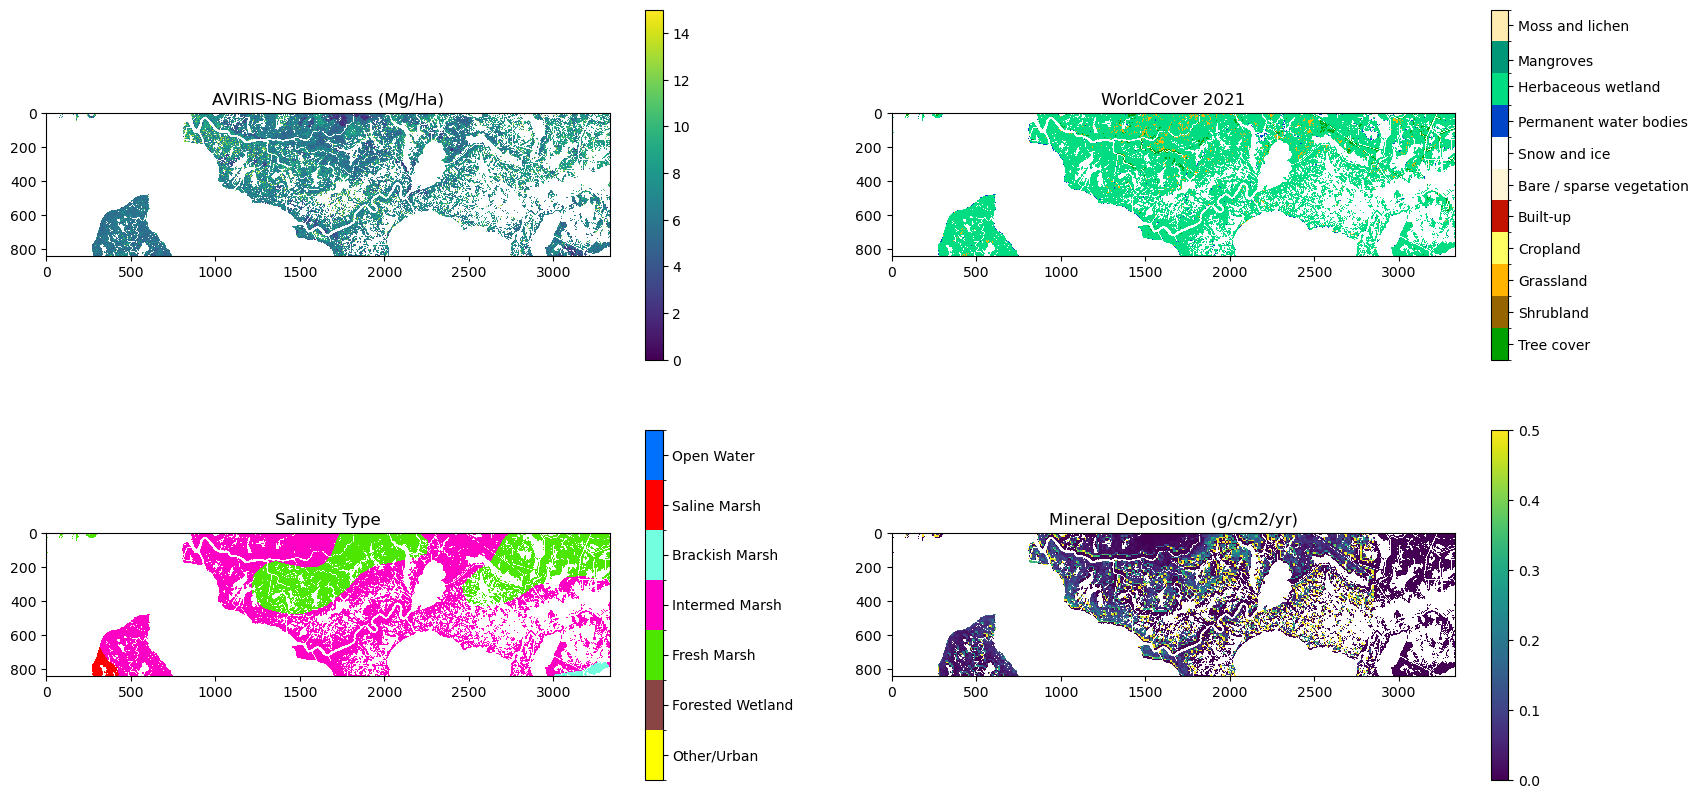

In [7]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize = (20,10))

im1 = ax1.imshow(AGB*mask,vmin=0,vmax=15,interpolation='nearest')
ax1.set_title('AVIRIS-NG Biomass (Mg/Ha)')
fig.colorbar(im1,ax = ax1)


colors = ['#00a000','#966400','#ffb400','#ffff64','#c31400','#fff5d7','#ffffff','#0046c8','#00dc82','#009678','#ffebaf']
values = [10,20,30,40,50,60,70,80,90,95,100]
labels = ["Tree cover","Shrubland","Grassland","Cropland","Built-up","Bare / sparse vegetation","Snow and ice","Permanent water bodies","Herbaceous wetland","Mangroves","Moss and lichen"]
bounds = np.append(values, values[-1] + 2)
ticks = [15,25,35,45,55,65,75,85,93,97,101]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, ncolors=len(colors))
im2 = ax2.imshow(LANDCOVER*mask,cmap=cmap,norm=norm,interpolation='nearest')
ax2.set_title('WorldCover 2021')
cbar = fig.colorbar(im2,ax=ax2,ticks = ticks)
cbar.ax.set_yticklabels(labels)  # horizontal colorbar


colors = ['#ffff00','#894444','#4ce600','#ff00c5','#73ffdf','#ff0000','#0070ff']
values =[1,2,3,4,5,6,7]
labels = ['Other/Urban','Forested Wetland','Fresh Marsh','Intermed Marsh','Brackish Marsh','Saline Marsh','Open Water']
bounds = np.append(values, values[-1] + 1)
ticks = [1.5,2.5,3.5,4.5,5.5,6.5,7.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, ncolors=len(colors))
im3 = ax3.imshow(SALINITY*mask,cmap=cmap,norm=norm,interpolation='nearest')
cbar = fig.colorbar(im3,ax=ax3,ticks = ticks)
cbar.ax.set_yticklabels(labels)  # horizontal colorbar
ax3.set_title('Salinity Type')


im4 = ax4.imshow(MORPHO*mask,vmin=0,vmax=.5,interpolation='nearest')
ax4.set_title('Mineral Deposition (g/cm2/yr)')
fig.colorbar(im4,ax = ax4)    
   

## Get Input Parameters

### From Delft3D Model IMAR output:
- si = inorganic matter deposition rate on the soil surface (g/cm2/yr)
- oms = organic matter deposition rate on the soil surfcae (g/cm2/yr)

### From AVIRIS-NG Biomass data products:
- r0 = root biomass at the surface (g/cm2)

### Based on landcover type:
- b0 = self-packing density of organic matter (g/cm3)
- bi = self-packing density of inorganic matter (g/cm3)
- c0 = lignin content in the surface deposit (g/g)
- c1 = ash content in the root biomass (g/g)
- c2 = cellulose content in the surface deposit (g/g)
- c4 = cellulose content in the root biomass(g/g)
- fc1 = lignin content in the root biomass
- kb = belowground decomposition rate of labile organic matter (1/yr)
- kc = cellulos decomposition rate (1/yr)
- kl = lignin decomposition rate (1/yr)
- kr = root turnover rate (1/yr)
- e = root attenuation rate

In [8]:
run_config = pd.DataFrame({
                    'lat':lats.flatten(),
                    'long':lons.flatten()
                        })

In [9]:
parameters_df = pd.read_csv(script_dir/'parameters_by_class.csv')
parameters = parameters_df.columns


In [10]:
for parameter in parameters[2:14]:
    print(parameter)
    lut = parameters_df[parameter].values
    output = lut[CLASSES]*mask
    run_config[parameter] = output.flatten()

b0
bi
c0
c1
c2
c4
fc1
kb
kc
kl
kr
e


In [11]:
oms = calculate_organicmatter_loading(MORPHO,CLASSES,mask,parameters_df['omssi'].values)
run_config['oms'] = oms.flatten()
run_config['si'] = MORPHO.flatten()

r0 = calculate_belowground_biomass(AGB,mask,CLASSES,parameters_df['e'].values,parameters_df['bgbagb'].values)
run_config['r0'] = r0.flatten()

#########################
[[oms ==> ORGANIC MASS ACCUMULATION RATE]]
Units = g/cm2/yr
#########################

#########################
[[r0 ==> BELOWGROUND BIOMASS]]
BGB:AGB = 0.35 fresh marsh, 0.62 brackish marsh, and 1.26 saline marsh
BGB at surface (r0) = (r50 * e)/(1-exp(e*50))
Attenuation rate (e) = 0.03 fresh marsh, 0.05 brackish marsh, and 0.0406 saline marsh
Units = g/cm2
#########################



In [12]:
# run_config = run_config.dropna().reset_index()
run_config['id'] = run_config.index

run_config[:].to_csv(example_dir/'NUMAR_Parameters.csv')

## Run NUMAR model for 10 years

In [18]:
year100 = run_numar(example_dir/'NUMAR_Parameters.csv',example_dir/'NUMAR_results.csv')

Constructed input file path: /Users/alchrist/Documents/GitHub/deltax_workshop_2024/tutorials/6_NUMARModel/Landscape_example/NUMAR_Parameters.csv
There are 2812248 pixels
calc for site_id 5000.0 completed 0.2%
calc for site_id 10000.0 completed 0.4%
calc for site_id 15000.0 completed 0.5%
calc for site_id 25000.0 completed 0.9%
calc for site_id 30000.0 completed 1.1%
calc for site_id 35000.0 completed 1.2%
calc for site_id 40000.0 completed 1.4%
calc for site_id 45000.0 completed 1.6%
calc for site_id 50000.0 completed 1.8%
calc for site_id 55000.0 completed 2.0%
calc for site_id 60000.0 completed 2.1%
calc for site_id 65000.0 completed 2.3%
calc for site_id 70000.0 completed 2.5%
calc for site_id 75000.0 completed 2.7%
calc for site_id 85000.0 completed 3.0%
calc for site_id 95000.0 completed 3.4%
calc for site_id 100000.0 completed 3.6%
calc for site_id 105000.0 completed 3.7%
calc for site_id 110000.0 completed 3.9%
calc for site_id 115000.0 completed 4.1%
calc for site_id 125000.0 c

In [59]:
year100 = pd.read_csv(example_dir/'NUMAR_results.csv')


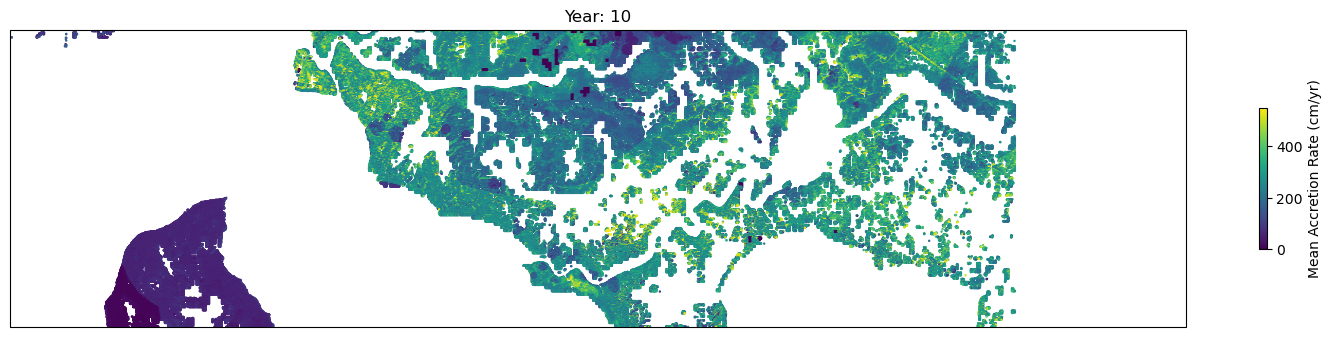

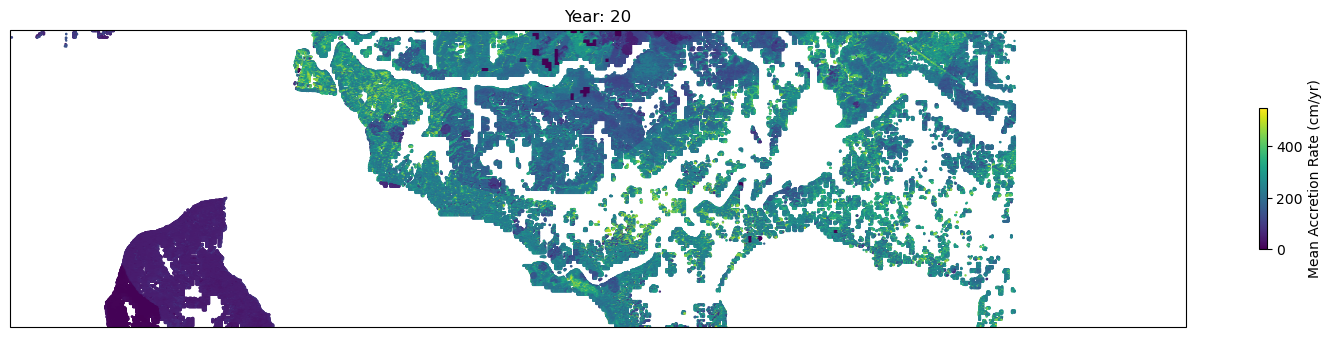

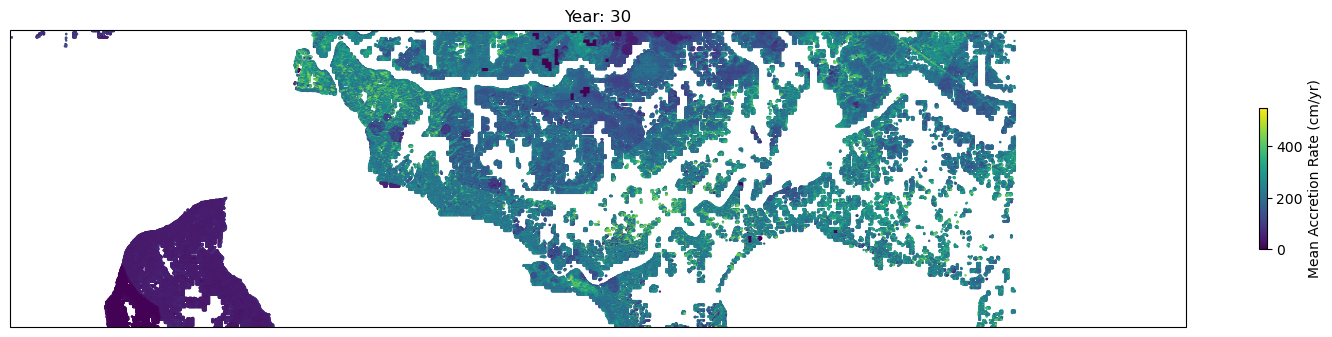

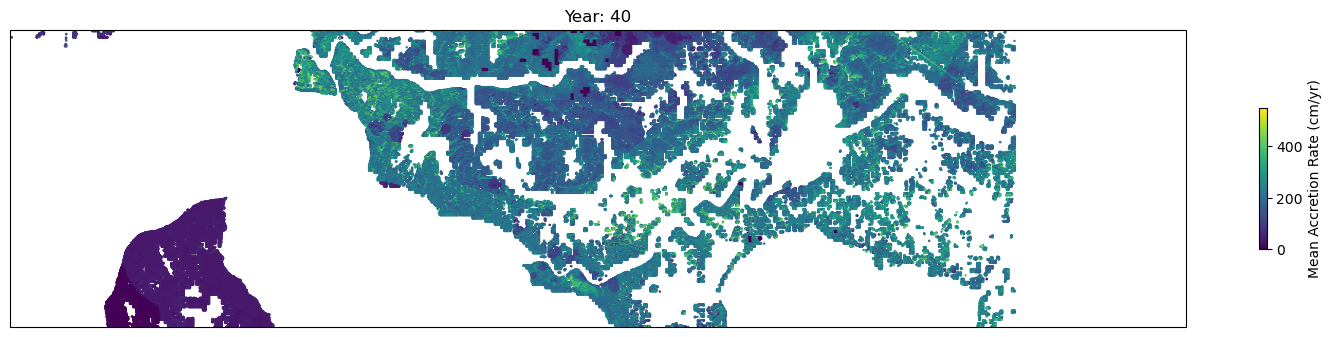

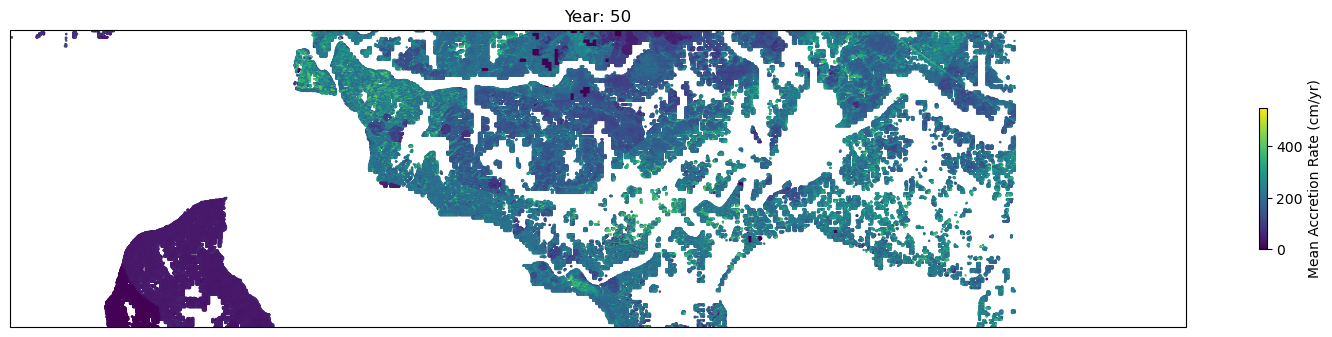

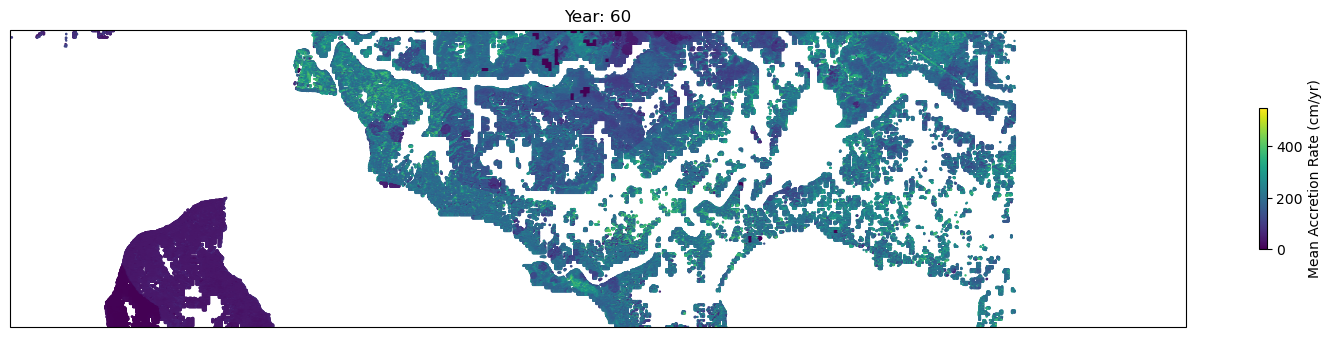

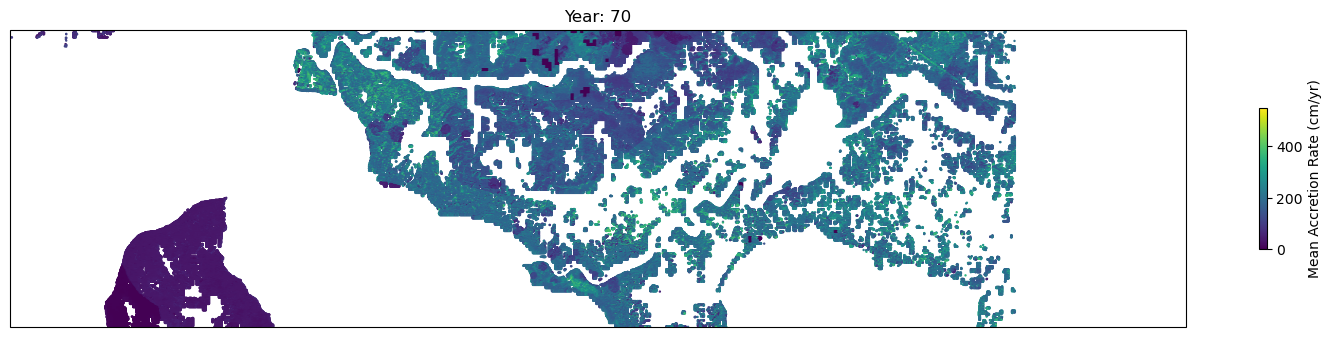

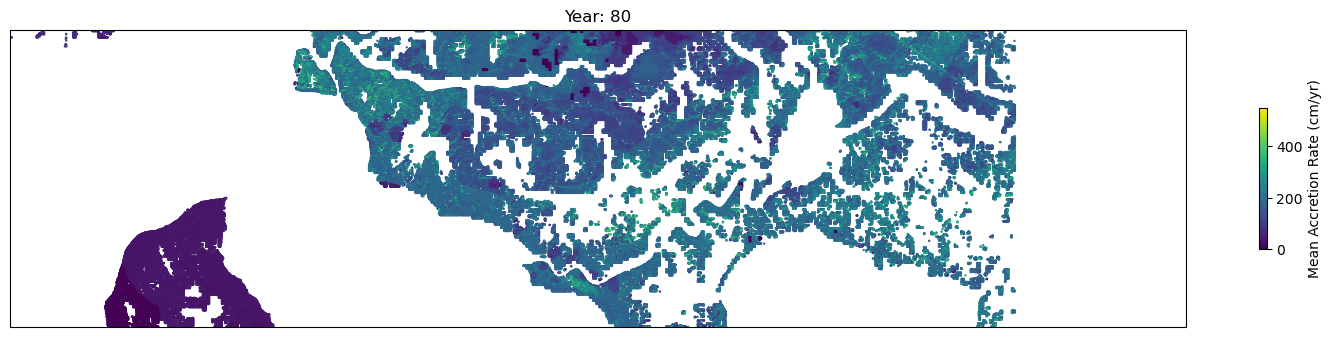

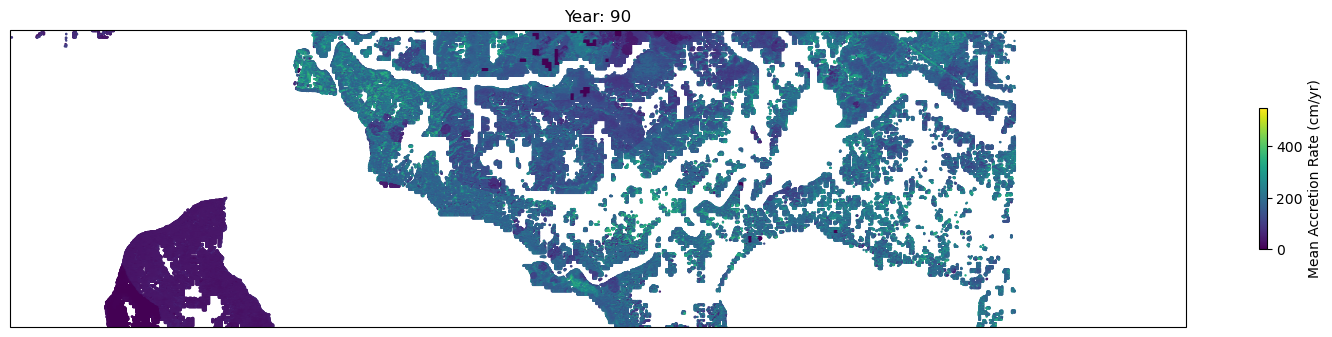

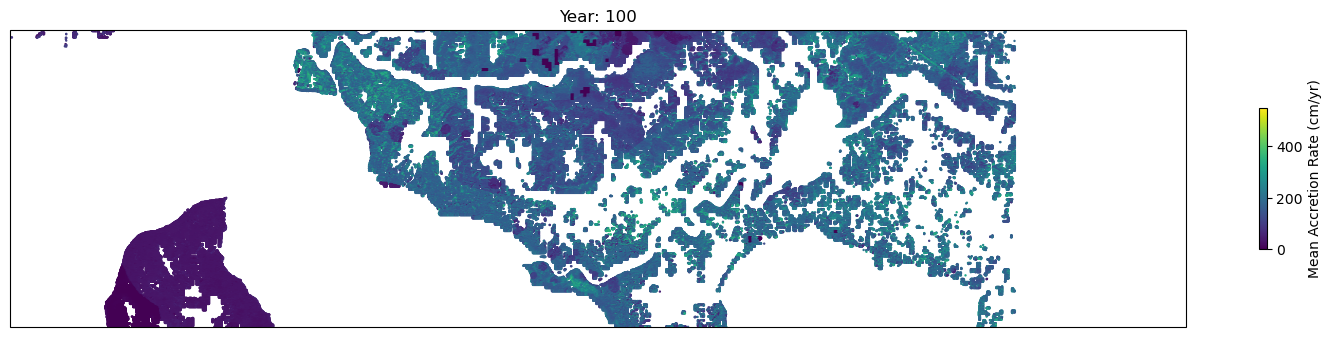

In [57]:
for year in np.arange(10,110,10):
    fig, ax= plt.subplots(1,1, figsize = (15,5),subplot_kw={'projection': ccrs.epsg(EPSG)})
    decade = year100[year100['Age_yr']==year]
    sc = ax.scatter(decade['long'],decade['lat'],s=0.5,vmin=0,vmax=550, c=decade['Mean Accretion (cm/yr)'])
    plt.colorbar(sc,label='Mean Accretion Rate (cm/yr)',shrink=0.3)
    plt.title('Year: ' + str(year))
    ax.set_extent([AOI.bounds.left,AOI.bounds.right,AOI.bounds.bottom,AOI.bounds.top], crs=ccrs.epsg(EPSG))
    fig.tight_layout()
    fig.savefig(example_dir/('MeanAccretion_Year%s.png'%(str(year).zfill(3))))


In [58]:
all_figs = [os.path.join(dirpath,f)
                for dirpath,dirnames, files in os.walk(example_dir)
                for f in fnmatch.filter(files,'MeanAccretion_Year*.png' )]
all_figs.sort()
with imageio.get_writer(example_dir / ('MeanAccretion_all.gif' ),mode='I',duration=200) as writer:
    for file in all_figs:
        image = imageio.imread(file)
        writer.append_data(image)
        
        